# ANN(2) - Vanishing Gradient & Optimization

이정재  
2024-03-29

## Vanishing Gradient

### Sigmoid

$$ Sigmoid(x) = \displaystyle\frac{1}{1+e^{-x}} \Rightarrow \displaystyle\frac{d}{dx}Sigmoid(x) = \frac{e^{-x}}{(1+e^{-x})^2}$$

<figure class="margin-caption">
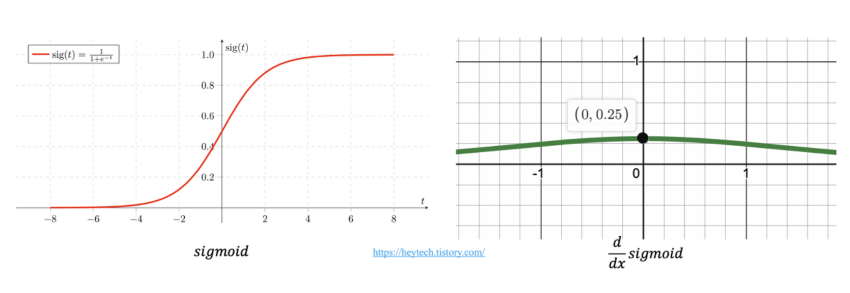
<figcaption aria-hidden="true">sigmoid.png</figcaption>
</figure>

-   Gradient Descent를 하다보면 Activation Function도 미분을 해야되는데
    Sigmoid의 최대값은 $\displaystyle\frac14$, 그외의 값은 거의 0에
    수렴한다.
-   Chain Rule을 적용해야하는 입장에서 보면, Sigmoid는 엄청난 기울기
    손실, Vanishing Gradient 문제를 가져온다. **Chain Rule** :
    $\displaystyle\frac{\partial L}{\partial x} = \displaystyle\frac{\partial L}{\partial a} \displaystyle\frac{\partial a}{\partial z}\displaystyle\frac{\partial z}{\partial x} \;\;\;\;\text{if)}\displaystyle\frac{\partial a}{\partial z}\approx 0$

### tanh

$$tanh(x) = \displaystyle\frac{e^{x} - e^{-x}}{e^{x}+e^{-x}} \Rightarrow \displaystyle\frac{d}{dx} tanh(x) = \displaystyle\frac{4}{(e^x+e^{-x})^2}$$

<figure class="margin-caption">
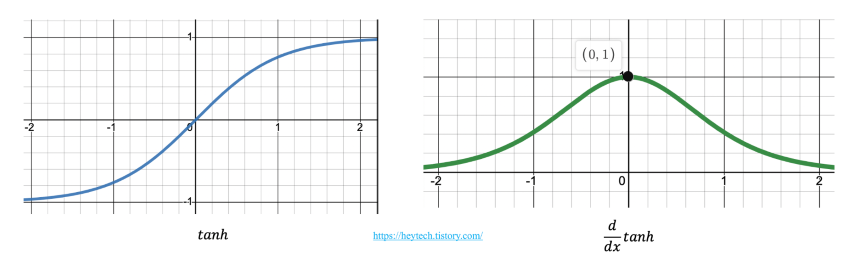
<figcaption aria-hidden="true">tanh.png</figcaption>
</figure>

-   또 하나의 Activation Function인 tanh도 마찬가지로 최대값은 1이고 그
    외의 값은 0에 수렴한다.
-   Sigmoid와 같이 Vanishing Gradient 문제가 발생한다.

### ReLU

<figure class="margin-caption">
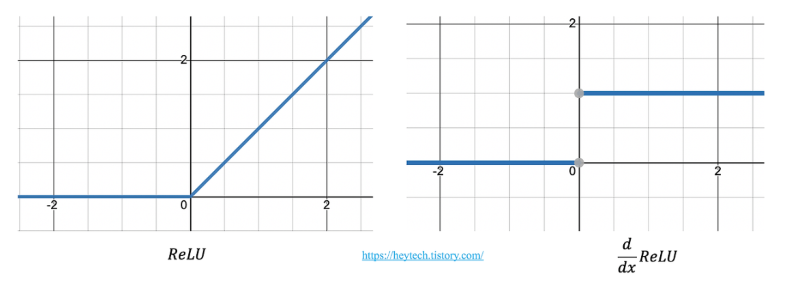
<figcaption aria-hidden="true">ReLU.png</figcaption>
</figure>

-   ReLU의 경우에는 $x \geq 0$인 상황에서 기울기는 항상 1이므로
    Vanishing Gradient 문제에 대한 돌파구가 될 수 있다.

### Leaky ReLU

<figure class="margin-caption">
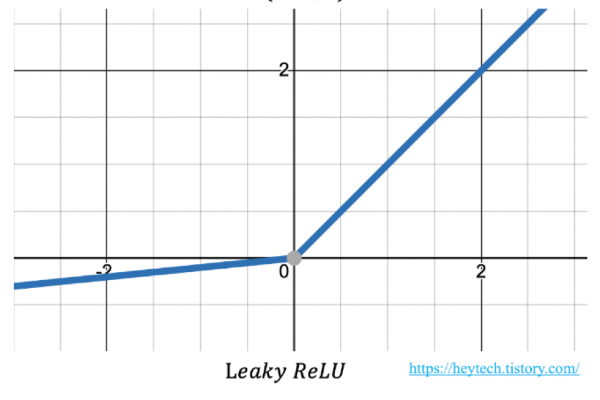
<figcaption aria-hidden="true">Leaky ReLU.png</figcaption>
</figure>

-   Leaky ReLU는 $x \leq 0$인 상황에서의 Vanishing Gradient 문제를
    해결하고자 만들어진 대안책이다.

## Optimization

### Gradient descent

$W = W - \alpha\displaystyle\frac{\partial}{\partial W} L(W,b)$  
$b = b - \alpha\displaystyle\frac{\partial}{\partial b} L(W,b)$  
$\alpha$ : learning rate & hypyer parameter

### SGD(Stochastic Gradient Descent)

$W = W - \alpha\displaystyle\frac{\partial}{\partial W} L(W,b\,;\,x^{(i)}, y^{(i)})$  
$b = b - \alpha\displaystyle\frac{\partial}{\partial b} L(W,b)\,;\,x^{(i)}, y^{(i)})$

### Momentum

<figure class="margin-caption">
<img
src="https://blog.kakaocdn.net/dn/u2SPb/btqVOrIzygp/ItV5KusFC28KwTu6mUR021/img.png"
alt="." />
<figcaption aria-hidden="true">.</figcaption>
</figure>

-   물리에서 사용되는 운동량의 개념에서 시작됨.
-   공이 내리막길을 다 내려가도 앞으로 나아가려는 성질을 이용함.
-   즉, local minima 문제를 해결할 수 있는 아이디어

$Vdw := \beta_1\cdot V  dw + (1-\beta_1) \cdot dw \left(dw = \displaystyle\frac{d}{dw}  L(w,b) \right)$  
$Vdb := \beta_1\cdot V  db + (1-\beta_1) \cdot db \left(db = \displaystyle\frac{d}{db}  L(w,b) \right)$  
$\beta_1$는 RMSprop에서 사용되는 $\beta_2$ 와 구분되기 위한 첨자임.

$W := W - \alpha \cdot Vdw$  
$b := b - \alpha \cdot Vdb$

-   $\beta$ 역시 $\alpha$(learning rate)처럼 하이퍼 파라미터이다.
    $\rightarrow$ 사람이 직접 정해줘야 하는 파라미터
-   경험적으로 $\beta$는 0.9로 많이 쓰인다. 식으로 살펴보자  
    \$Vdw := 0.9V dw + 0.1 dw $\
    $\$ 이는 $dw$를 10으로 나눈 것으로 과거 기울기 10개의 평균치를
    보겠다는 것과 같은 의미이다.
-   과거 기울기가 클수록 $Vdw$는 커지게 되고 이는 다음 $W$를
    update하는데 영향을 준다. $\rightarrow$ 기울기가 클수록 공이 다음
    언덕으로 올라갈 확률이 높아진다.

### RMSprop (Root Mean Square probability)

$Sdw = \beta_2\cdot V  dw + (1-\beta_2) \cdot (dw)^2 \left(dw = \displaystyle\frac{d}{dw}  L(w,b) \right)$  
$Sdb = \beta_2\cdot V  db + (1-\beta_2) \cdot (db)^2 \left(db = \displaystyle\frac{d}{db}  L(w,b) \right)$  
$\beta_2$는 Momentum에서 사용되는 $\beta_1$ 와 구분되기 위한 첨자임.

$W  := W - \alpha \cdot \displaystyle\frac{dw}{\sqrt{Sdw}} + \epsilon$  
$b  := b - \alpha \cdot \displaystyle\frac{dw}{\sqrt{Sdb}} + \epsilon$

-   Momentum과 비슷한 수식을 가지고 있지만, RMSprob에서는 $dw$가 제곱의
    형태임. $(dw) \rightarrow (dw)^2$
-   $\beta_2$역시 경험적으로 0.9가 많이 사용되는데, 이는 최근 10개의
    기울기에 대해 가중치를 두어서 parameter를 업데이트 하겠다는
    의미이다.

### Adam(Adaptive Momentum Estimation) : RMSprop **+** Momentum

$m_0 = 0 \, , \, v_0 = 0$  
$m_{t+1} := \beta_1 \cdot m_t + (1-\beta_1) \cdot \displaystyle\frac{\partial L}{\partial \theta}$  
\$v\_{t+1} := \_2 v_m + (1-\_2) ()^2 \$

$\theta := \theta - \displaystyle\frac{\epsilon}{\sqrt{v_t} + e^{-5}}$